**Chapter 2 – End-to-end Machine Learning project**

*This notebook contains all the sample code and solutions to the exercises in chapter 2.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [56]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


In [57]:
print("hello world")

hello world


This project requires Python 3.7 or above:

In [132]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [133]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [134]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    return pd.read_csv(Path("/content/drive/MyDrive/Fall 2023/Machine Learning CS7267/Assignment 1/dubai_apt.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [135]:
housing.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,'Palm Jumeirah',25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,'Palm Jumeirah',25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,'Jumeirah Lake Towers',25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,'Culture Village',25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,'Palm Jumeirah',25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [136]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [65]:
housing["quality"].value_counts()

Medium    1146
Low        544
High       134
Ultra       81
Name: quality, dtype: int64

In [66]:
housing.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [67]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

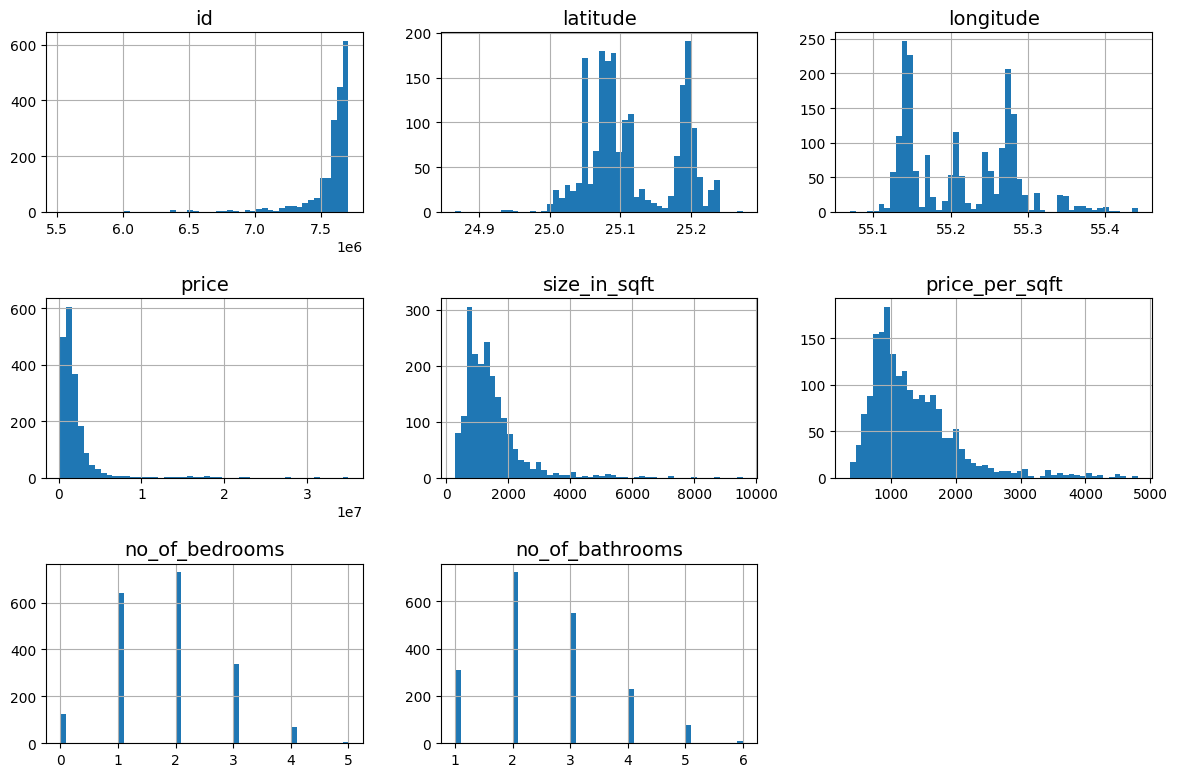

In [68]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [137]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [138]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

1524

In [139]:
len(test_set)

381

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [140]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [116]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [117]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [118]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [119]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [120]:
test_set["price_per_sqft"].isnull().sum()

0

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [121]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929913


If you prefer simulations over maths, here's how you could get roughly the same result:

In [122]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [144]:
housing["price_per_sqft_cat"] = pd.cut(housing["price_per_sqft"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

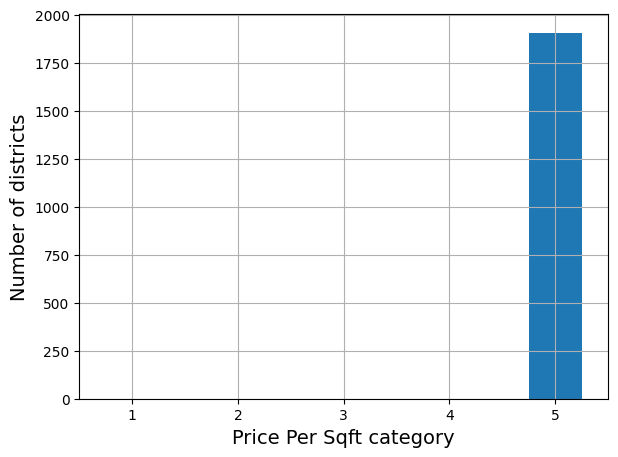

In [145]:
housing["price_per_sqft_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Price Per Sqft category")
plt.ylabel("Number of districts")
save_fig("ppsqft_cat_bar_plot")  # extra code
plt.show()

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["price_per_sqft_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [147]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [148]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["price_per_sqft_cat"], random_state=42)

In [149]:
strat_test_set["price_per_sqft_cat"].value_counts() / len(strat_test_set)

5    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: price_per_sqft_cat, dtype: float64

In [150]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["price_per_sqft_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Longitude Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Longitude Category,,,,,
1,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,NaN,NaN
5,100.0,100.0,100.0,0.0,0.0


In [88]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_per_sqft", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [130]:
housing = strat_train_set.copy()

In [131]:
print(housing.columns)

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet', 'price_per_sqft_cat'],
      dtype='object')


## Visualizing Geographical Data

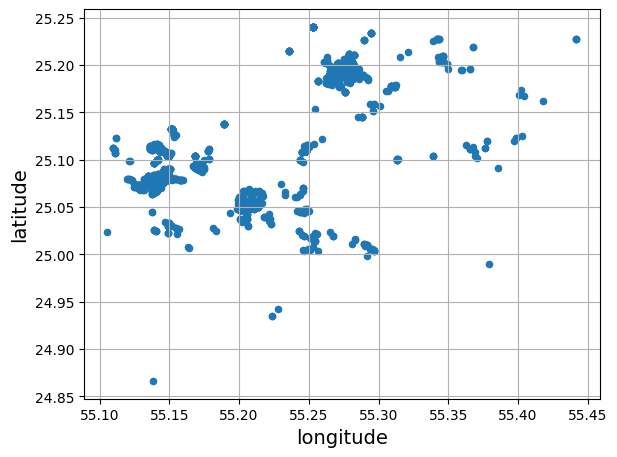

In [91]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

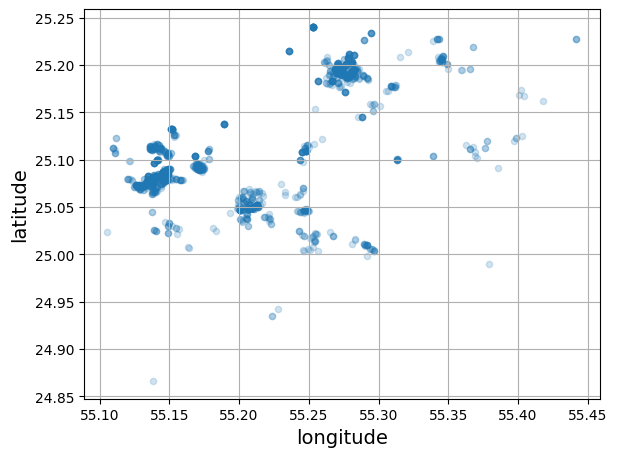

In [92]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

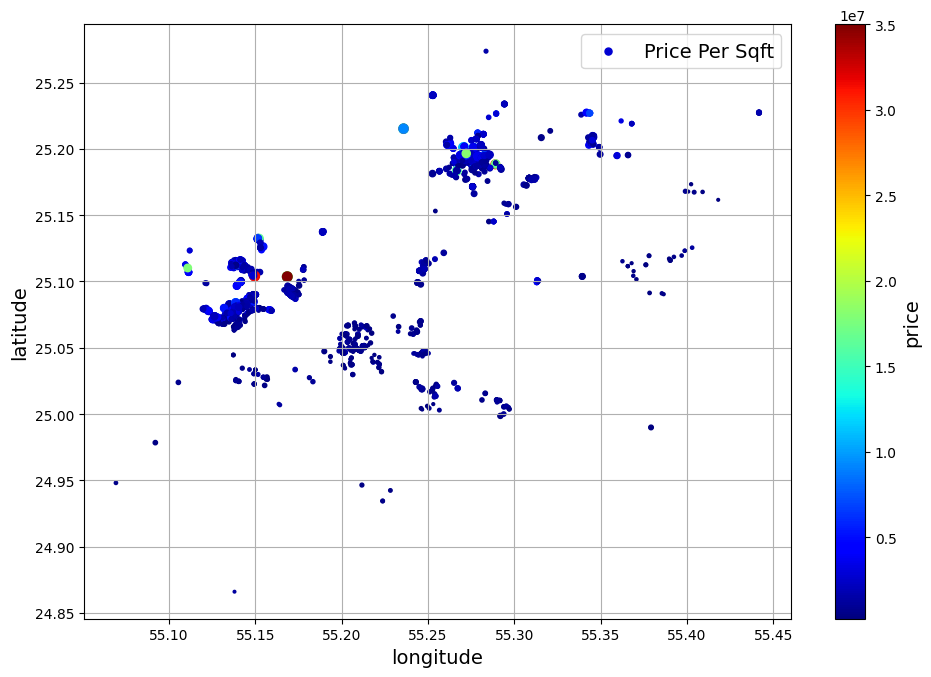

In [98]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["price_per_sqft"] / 100, label="Price Per Sqft",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

## Looking for Correlations

In [154]:
corr_matrix = housing.corr()

<ipython-input-154-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [155]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
size_in_sqft           0.811005
no_of_bedrooms         0.501286
no_of_bathrooms        0.491863
private_pool           0.355616
latitude               0.198546
maid_room              0.128370
concierge              0.126777
view_of_water          0.093275
private_jacuzzi        0.082886
private_gym            0.071243
private_garden         0.051676
central_ac             0.037070
built_in_wardrobes     0.034395
covered_parking        0.032604
unfurnished            0.032234
maid_service           0.029864
view_of_landmark       0.012874
balcony                0.002162
shared_spa             0.001450
walk_in_closet        -0.008778
kitchen_appliances    -0.014315
study                 -0.016443
longitude             -0.021861
id                    -0.034999
shared_gym            -0.042511
shared_pool           -0.071280
barbecue_area         -0.075477
security              -0.075567
vastu_compliant       -0.081727
networked             -0.081896
children

## Experimenting with Attribute Combinations

# Prepare the Data for Machine Learning Algorithms

In [151]:
print(strat_train_set.columns)

Index(['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet', 'price_per_sqft_cat'],
      dtype='object')


Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [153]:
housing = strat_train_set.drop("price_per_sqft", axis=1)
housing_labels = strat_train_set["price_per_sqft"].copy().info()

<class 'pandas.core.series.Series'>
Int64Index: 1524 entries, 619 to 303
Series name: price_per_sqft
Non-Null Count  Dtype  
--------------  -----  
1524 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [157]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,price_per_sqft_cat


In [158]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["price"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,price_per_sqft_cat


In [159]:
housing_option2 = housing.copy()

housing_option2.drop("no_of_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,no_of_bathrooms,quality,maid_room,unfurnished,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,price_per_sqft_cat


In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical columns
num_attribs = ['price', 'size_in_sqft', 'price_per_sqft']
cat_attribs = ['quality', 'neighborhood']

# Numerical pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

train_set_prepared = full_pipeline.fit_transform(train_set)


In [164]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_prepared, train_set['price'])


LinearRegression()

In [207]:
some_data = train_set.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_labels = train_set['price'].iloc[:5]

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [1200005.39360247 5500000.34240282 2450000.55528642  990876.30587779
  420021.35945539]
Labels: [1200000, 5500000, 2450000, 990876, 420000]


In [208]:
from sklearn.metrics import mean_squared_error, r2_score

test_set_prepared = full_pipeline.transform(test_set)
test_predictions = lin_reg.predict(test_set_prepared)
test_labels = test_set['price']

rmse = mean_squared_error(test_labels, test_predictions, squared=False)
r2 = r2_score(test_labels, test_predictions)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


RMSE: 9.151879695042284
R2 Score: 0.9999999999896777


In [ ]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [166]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [167]:
housing_num = housing.select_dtypes(include=[np.number])

In [168]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [169]:
imputer.statistics_

array([7.62933150e+06, 2.50951695e+01, 5.52066175e+01, 1.42400000e+06,
       1.29350000e+03, 2.00000000e+00, 2.00000000e+00])

Check that this is the same as manually computing the median of each attribute:

In [170]:
housing_num.median().values

array([7.62933150e+06, 2.50951695e+01, 5.52066175e+01, 1.42400000e+06,
       1.29350000e+03, 2.00000000e+00, 2.00000000e+00])

Transform the training set:

In [171]:
X = imputer.transform(housing_num)

In [172]:
imputer.feature_names_in_

array(['id', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'no_of_bedrooms', 'no_of_bathrooms'], dtype=object)

In [173]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [174]:
housing_tr.loc[null_rows_idx].head()

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms


In [175]:
imputer.strategy

'median'

In [176]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [177]:
housing_tr.loc[null_rows_idx].head()  # not shown in the book

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms


In [ ]:
#from sklearn import set_config
#
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

Now let's drop some outliers:

In [178]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [179]:
outlier_pred

array([-1,  1,  1, ..., -1,  1,  1])

If you wanted to drop outliers, you would run the following code:

In [180]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [182]:
housing_cat = housing[["quality"]]
housing_cat.head(8)

,quality
619,Low
532,Low
1543,Medium
138,Low
1157,Ultra
1474,Medium
1818,Ultra
190,Low


In [183]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [184]:
housing_cat_encoded[:8]

array([[1.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.]])

In [185]:
ordinal_encoder.categories_

[array(['High', 'Low', 'Medium', 'Ultra'], dtype=object)]

In [186]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [187]:
housing_cat_1hot

<1524x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1524 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [188]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [189]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [190]:
cat_encoder.categories_

[array(['High', 'Low', 'Medium', 'Ultra'], dtype=object)]

In [193]:
df_test = pd.DataFrame({"quality": ["Low", "Medium"]})
pd.get_dummies(df_test)

,quality_Low,quality_Medium
0,1,0
1,0,1


In [194]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [195]:
df_test_unknown = pd.DataFrame({"quality": ["High", "Low"]})
pd.get_dummies(df_test_unknown)

,quality_High,quality_Low
0,1,0
1,0,1


In [196]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [197]:
cat_encoder.feature_names_in_

array(['quality'], dtype=object)

In [198]:
cat_encoder.get_feature_names_out()

array(['quality_High', 'quality_Low', 'quality_Medium', 'quality_Ultra'],
      dtype=object)

In [199]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [200]:
df_output

,quality_High,quality_Low,quality_Medium,quality_Ultra
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0


## Feature Scaling

In [201]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [202]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

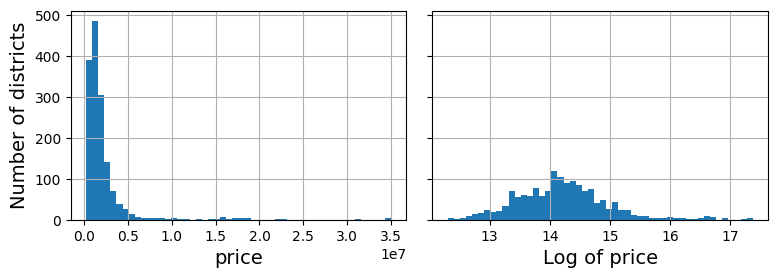

In [211]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["price"].hist(ax=axs[0], bins=50)
housing["price"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("price")
axs[1].set_xlabel("Log of price")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

In [216]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["price"]], [[35]], gamma=0.1)

## Custom Transformers

To create simple transformers:

In [219]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["price"]])

In [220]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["price"]])

In [221]:
age_simil_35

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [222]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [223]:
sf_simil

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [224]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [225]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [226]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [227]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [228]:
similarities[:3].round(2)

array([[1.  , 0.96, 1.  , 0.95, 0.93, 0.99, 0.99, 1.  , 0.99, 0.95],
       [1.  , 0.97, 0.99, 0.97, 0.95, 1.  , 0.99, 1.  , 0.99, 0.96],
       [0.97, 1.  , 0.96, 0.98, 0.99, 0.96, 0.99, 0.95, 0.97, 1.  ]])

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [230]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('std_scaler', StandardScaler())])

In [231]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[ 0.1 , -1.32, -0.9 , -0.6 , -0.98, -1.9 , -1.43],
       [ 0.05, -1.26, -0.09, -0.57, -1.08, -1.9 , -0.49]])

In [232]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [233]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [234]:
df_housing_num_prepared.head(2)  # extra code

,id,latitude,longitude,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms
619,0.102100,-1.318510,-0.904568,-0.602421,-0.980236,-1.898373,-1.430229
532,0.049111,-1.259331,-0.089178,-0.565869,-1.078194,-1.898373,-0.492737


In [235]:
num_pipeline.steps

[('std_scaler', StandardScaler())]

In [237]:
num_pipeline[:-1]

Pipeline(steps=[])

In [239]:
num_pipeline.named_steps["std_scaler"]

StandardScaler()

In [242]:
num_pipeline.set_params(std_scaler="memory")

Pipeline(steps=[('std_scaler', 'memory')])